<a href="https://colab.research.google.com/github/vasefsta/Sentimental-Analysis/blob/main/data_mining_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία-1

#### Μέλη Ομάδας: Βασιλική Ευσταθίου (sdi1800229), Νίκος Ευτυχίου (sdi1800221)

In [ ]:
# READ THE DATA FROM THE PICKLE FILE
# AND STORE THEM IN A DATAFRAME

import warnings
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split  

warnings.filterwarnings("ignore")

rd.seed(500)

filePath = "./eclass_all_with_sentiment_v2.pkl"

df = pd.read_pickle(filePath)
percent = 0.5

df = df.iloc[:int(len(df)*percent)]

In [ ]:
# FUNCTIONS FOR THE DATA CLEANING, TOKENIZATION AND LEMMATIZATION

import re
import nltk
import spacy
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

def clean_data(df):
  cltweets = []

  # LISTS FOR BONUS 
  emark = []
  qmark = []
  atmark = []
  hyplinks = []

  for tweet in df['text']:
    tweet = tweet.lower()
    cltweets.append(tweet)

  df['text'] = cltweets

  cltweets = []
  strtweet = []

  for tweet in df['text']:
    emark.append(tweet.count('!'))
    qmark.append(tweet.count('?'))
    atmark.append(tweet.count('@'))
    
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)

    cltweets.append(tweet)

  df['text'] = cltweets

  cltweets = []

  for tweet in df['text']:
    numlinks = tweet.count('http\S+')
    numlinks += tweet.count('www.S+')

    hyplinks.append(numlinks)

    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www.\S+", "", tweet)

    cltweets.append(tweet)

  df['text'] = cltweets

  cltweets = []

  for tweet in df['text']:
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)

    cltweets.append(tweet)

  df['text'] = cltweets

  cltweets = []

  for tweet in df['text']:
    tweet = re.sub("[^a-z]"," ", tweet)
    
    cltweets.append(tweet)

  df['text'] = cltweets
  df['emark'] = emark
  df['qmark'] = qmark
  df['atmark'] = atmark
  df['hyplinks'] = hyplinks

  return df


def make_tokens(df):
  cltweets = []

  for tweet in df['text']:
    tweet = tweet.split()

    cltweets.append(tweet)

  df['text'] = cltweets

  return df


def remove_stopwords(df):
  nltk.download('stopwords')
  sw = nltk.corpus.stopwords.words('english')

  cltweets = []

  for tweet, i in zip(df['text'], range(df.shape[0])):
    swtweet = []

    for token in tweet:
      if token not in sw:
        swtweet.append(token)
  
    if len(swtweet) == 0:
      df.drop([i], axis=0, inplace=True)
    else:
      cltweets.append(swtweet)

  df['text'] = cltweets

  return df


def make_lemmas(df):
  cltweets = []

  nlp = spacy.load('en')

  strtweet = []

  for tweet in df['text']:
    token = ""

    for t in tweet:
      token += t
      token += ' '
    
    strtweet.append(token)

  for tweet in strtweet:   
    doc = nlp(tweet)

    lemtweet = ""
    for token in doc:
      lemtweet += token.lemma_
      lemtweet += " "

    cltweets.append(lemtweet)

  df['text'] = cltweets

  return df

In [ ]:
# CALL THE ABOVE FUNCTIONS

df = clean_data(df)

df = make_tokens(df)

df = remove_stopwords(df)

df = make_lemmas(df)

df_lda = df.copy(deep=True)     # WE NEED IT FOR THE LDA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Emotional Distribution')

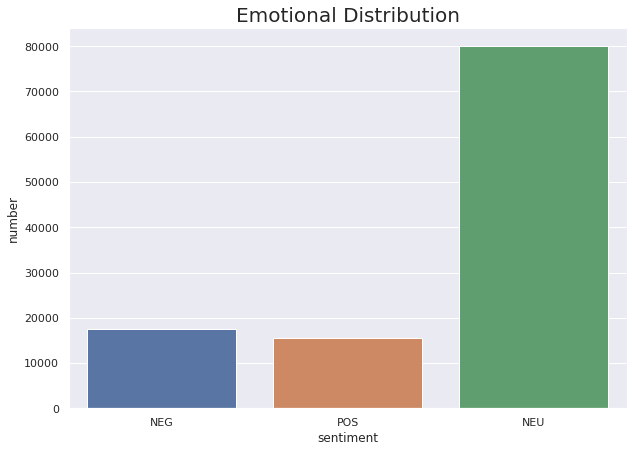

In [ ]:
# EMOTION DISTRIBUTION

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

numOfPos = df[df['sentiment'] == 'POS']['sentiment'].count()

numOfNeg = df[df['sentiment'] == 'NEG']['sentiment'].count()

numOfNeu = df[df['sentiment'] == 'NEU']['sentiment'].count()

axisY = []

axisY.append(numOfNeg)
axisY.append(numOfPos)
axisY.append(numOfNeu)

axisX = []

axisX.append("NEG")
axisX.append("POS")
axisX.append("NEU")

new_columns = ["sentiment", "number"]
df_graph = pd.DataFrame(list(zip(axisX, axisY)), columns = new_columns)

sns.set(rc={'figure.figsize':(10,7)})
p = sns.barplot(x = 'sentiment', y = 'number', data = df_graph, ci = None)

p.set_title('Emotional Distribution', fontsize = 20)


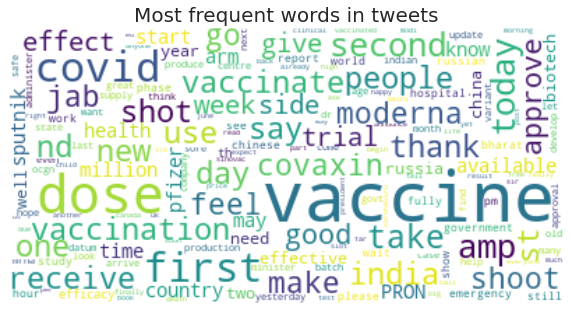

In [ ]:
# MOST FREQUENT WORDS IN TWEETS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = set()
for tweet in df['text']:
  text.add(tweet)

strtext = ""
for token in text:
  strtext += token
  strtext += " "


wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white", collocations=False).generate(strtext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most frequent words in tweets', fontdict={'fontsize': 20})
plt.show()

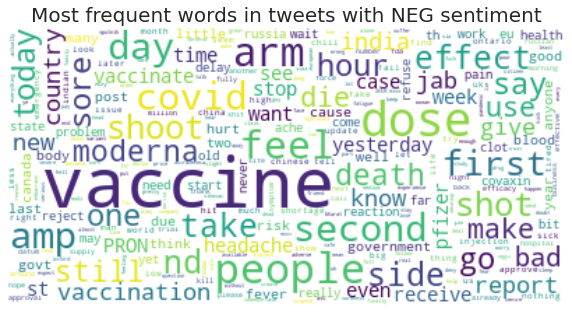

In [ ]:
# MOST FREQUENT WORDS IN TWEETS WITH NEGATIVE SENTIMENT

df_neg = df.groupby(["sentiment"]).get_group("NEG")

text = set()
for tweet in df_neg['text']:
  text.add(tweet)

strtext = ""
for token in text:
  strtext += token
  strtext += " "

wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white", collocations=False).generate(strtext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most frequent words in tweets with NEG sentiment', fontdict={'fontsize': 20})
plt.show()



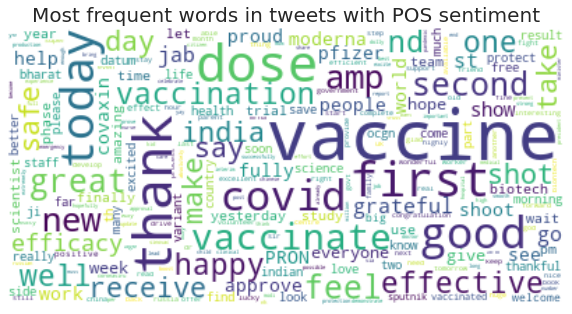

In [ ]:
# MOST FREQUENT WORDS IN TWEETS WITH POSITIVE SENTIMENT

df_pos = df.groupby(["sentiment"]).get_group("POS")

text = set()
for tweet in df_pos['text']:
  text.add(tweet)

strtext = ""
for token in text:
  strtext += token
  strtext += " "

wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white", collocations=False).generate(strtext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most frequent words in tweets with POS sentiment', fontdict={'fontsize': 20})
plt.show()

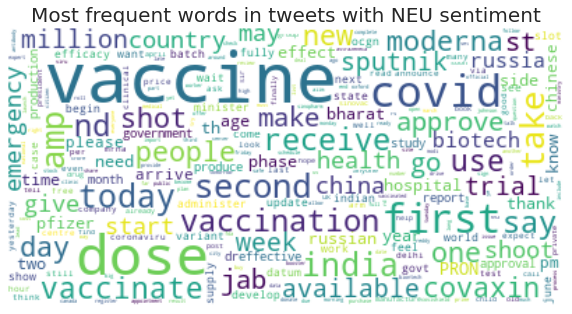

In [ ]:
# MOST FREQUENT WORDS IN TWEETS WITH NEUTRAL SENTIMENT

df_neu = df.groupby(["sentiment"]).get_group("NEU")

text = set()
for tweet in df_neu['text']:
  text.add(tweet)

strtext = ""
for token in text:
  strtext += token
  strtext += " "

wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white", collocations=False).generate(strtext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most frequent words in tweets with NEU sentiment', fontdict={'fontsize': 20})
plt.show()

In [ ]:
# FOR MODERNA

df_moderna=df[df['text'].str.contains('moderna')]

vaccine = []

numOfPos = df_moderna[df_moderna['sentiment'] == 'POS']['sentiment'].count()

numOfNeg = df_moderna[df_moderna['sentiment'] == 'NEG']['sentiment'].count()

numOfNeu = df_moderna[df_moderna['sentiment'] == 'NEU']['sentiment'].count()

axisY = []

axisY.append(numOfNeg)
axisY.append(numOfPos)
axisY.append(numOfNeu)

axisX = []

axisX.append("NEG")
axisX.append("POS")
axisX.append("NEU")

vaccine += 3*['MODERNA']

In [ ]:
# FOR PFIZER

df_pfizer = df[df['text'].str.contains('pfizer', 'biontech') ]

numOfPos = df_pfizer[df_pfizer['sentiment'] == 'POS']['sentiment'].count()

numOfNeg = df_pfizer[df_pfizer['sentiment'] == 'NEG']['sentiment'].count()

numOfNeu = df_pfizer[df_pfizer['sentiment'] == 'NEU']['sentiment'].count()


axisY.append(numOfNeg)
axisY.append(numOfPos)
axisY.append(numOfNeu)


axisX.append("NEG")
axisX.append("POS")
axisX.append("NEU")

vaccine += 3*['PFIZER']

In [ ]:
# FOR ASTRAZENECA

df_astra=df[df['text'].str.contains('astra')]

numOfPos = df_astra[df_astra['sentiment'] == 'POS']['sentiment'].count()

numOfNeg = df_astra[df_astra['sentiment'] == 'NEG']['sentiment'].count()

numOfNeu = df_astra[df_astra['sentiment'] == 'NEU']['sentiment'].count()


axisY.append(numOfNeg)
axisY.append(numOfPos)
axisY.append(numOfNeu)


axisX.append("NEG")
axisX.append("POS")
axisX.append("NEU")

vaccine += 3*['ASTRA']

Text(0.5, 1.0, 'Sentiment Distribution per Vaccine')

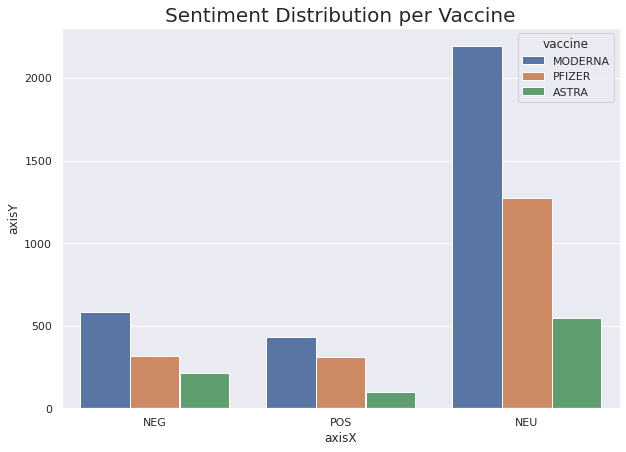

In [ ]:
# GRAPHS FOR SENTIMENT DISTRIBUTION PER VACCINE

df_vacc = pd.DataFrame(data=list(zip(axisY, axisX, vaccine)), columns=['axisY', 'axisX', 'vaccine'])

p = sns.barplot(x='axisX', y='axisY', data=df_vacc, ci=None, hue='vaccine')

p.set_title('Sentiment Distribution per Vaccine', fontsize=20)

Text(0.5, 1.0, 'Tweets per month')

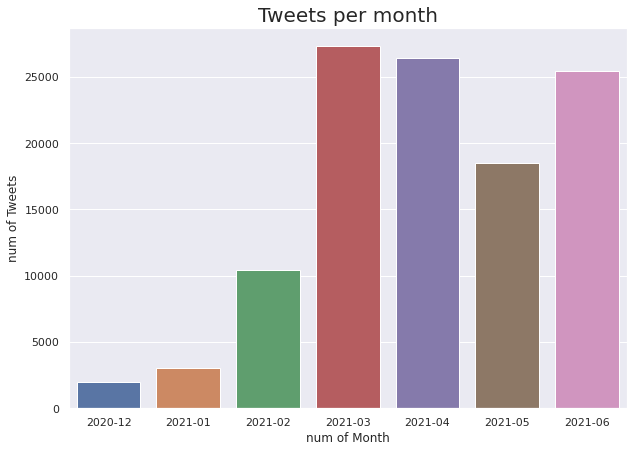

In [ ]:
# TWEETS PER MONTH

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(by="date")

df_months = df.groupby([df.date.dt.to_period('m')])['text'].agg({'count'})

df_months.columns = ["num of Tweets"]

arr_month = df['date'].dt.to_period('m')

arr_month = arr_month.unique()

num_of_tweets = list(df_months["num of Tweets"])

df_months = pd.DataFrame(list(zip(arr_month, num_of_tweets)), columns=['num of Month', 'num of Tweets'])

p = sns.barplot(x = 'num of Month', y = 'num of Tweets', data = df_months, ci = None)

p.set_title('Tweets per month', fontsize=20)

## Παρατήρηση 

1) Τα περισσότερα tweets υπήρξαν τον Φεβρουάριο και τον Μάρτιο του 2021. Σε εκείνο το διάστημα οι περισσότερες χώρες ανά το παγκόσμιο βρίσκονταν σε lockdown.

2) Τον Μάιο και τον Ιούνιο του 2021 ξεκίνησαν οι άρσεις των μέτρων σχετικά με τον κορωνοϊο και η κατάργηση του lockdown  στις περισσότερες χώρες στον κόσμο.

In [ ]:
# CREATE TRAINING AND TEST SET

X_tr, X_te, Y_tr, Y_te = train_test_split(df['text'], df['sentiment'], test_size = 0.2)

In [ ]:
# CREATE BAG OF WORDS

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=1000)

X_tr_bow = vectorizer.fit_transform(X_tr).toarray()

X_te_bow = vectorizer.transform(X_te).toarray()

In [ ]:
# CREATE TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=1.0, min_df=0, max_features=1000, stop_words='english')

X_tr_tf = vectorizer.fit_transform(X_tr).toarray()

X_te_tf = vectorizer.transform(X_te).toarray()

In [ ]:
# CREATE WORD-EMBEDDINGS

import os
import zipfile
import numpy as np
import pickle

!wget --no-check-certificate \
http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip

with zipfile.ZipFile('./glove.twitter.27B.zip', 'r') as zip_ref:
    zip_ref.extractall('./glove')

embeddings_index = {}
f = open('./glove/glove.twitter.27B.100d.txt')

numWeights = 100

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    
    if coefs.size == numWeights:
      coefs = coefs.reshape([1,numWeights])

    embeddings_index[word] = coefs

f.close()

X_tr_w2v = []

for tweet in X_tr:
  lwords = list(tweet.split())
  size = len(lwords)
  sumWeights = np.zeros((1,numWeights))

  for word in lwords:
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
      sumWeights = np.add(sumWeights, embedding_vector) 

  avgWeights = sumWeights / size

  X_tr_w2v.append(avgWeights)

X_tr_w2v = np.array(X_tr_w2v).reshape((len(X_tr_w2v), numWeights))

# df_w2v_tr = pd.DataFrame(X_tr_w2v.toarray())

# df_w2v_tr.to_pickle("./w2v_tr.pkl")

X_te_w2v = []

for tweet in X_te:
  lwords = list(tweet.split())
  size = len(lwords)
  sumWeights = np.zeros((1, numWeights))

  for word in lwords:
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
      sumWeights = np.add(sumWeights, embedding_vector) 

  avgWeights = sumWeights / size

  X_te_w2v.append(avgWeights)

X_te_w2v = np.array(X_te_w2v).reshape((len(X_te_w2v), numWeights))

--2022-05-04 13:21:44--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.12MB/s    in 4m 46s  

2022-05-04 13:26:30 (5.07 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



In [ ]:
# SVM MODEL

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

parameters = {'C': [0.1, 1, 10, 100],
              # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 4, 6],
              'coef0': [0.1, 0.5, 0.8]}

svm = SVC()

# USING BAG OF WORDS
grid_search = GridSearchCV(estimator = svm, param_grid = parameters, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_tr_bow, Y_tr)
y_pred = grid_search.predict(X_te_bow)

accuracy = []
precision = []
recall = []
f1 = []
model = []
vector = []


accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("SVM")
vector.append("BOW")


# USING TFIDF
svm.fit(X_tr_tf, Y_tr)
y_pred = svm.predict(X_te_tf)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("SVM")
vector.append("TF-IDF")

# USING W2V

svm.fit(X_tr_w2v, Y_tr)
y_pred = svm.predict(X_te_w2v)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("SVM")
vector.append("W2V")

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
# RFC MODEL

from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [10, 100, 250],
              # 'criterion': ['entropy', 'gini'],
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [2, 4, 6]}

rfc = RandomForestClassifier()

# USING BAG OF WORDS
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_tr_bow, Y_tr)
y_pred = grid_search.predict(X_te_bow)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("RFC")
vector.append("BOW")

# USING TF-IDF

rfc.fit(X_tr_tf, Y_tr)
y_pred = rfc.predict(X_te_tf)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("RFC")
vector.append("TF-IDF")


# USING W2V

rfc.fit(X_tr_w2v, Y_tr)
y_pred = rfc.predict(X_te_w2v)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("RFC")
vector.append("W2V")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [ ]:
# KNN MODEL

from enum import auto
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5, 7, 11, 13],
              'n_jobs': [-1],
              # 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [30, 40, 50],
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()

# USING BAG OF WORDS

grid_search = GridSearchCV(estimator = knn, param_grid = parameters, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_tr_bow, Y_tr)
y_pred = grid_search.predict(X_te_bow)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("KNN")
vector.append("BOW")


# USING TF-IDF

knn.fit(X_tr_tf, Y_tr)
y_pred = knn.predict(X_te_tf)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("KNN")
vector.append("TF-IDF")


# USING W2V

knn.fit(X_tr_w2v, Y_tr)
y_pred = knn.predict(X_te_w2v)

accuracy.append(accuracy_score(Y_te, y_pred))
precision.append(precision_score(Y_te, y_pred, average='macro'))
recall.append(recall_score(Y_te, y_pred, average='macro'))
f1.append(f1_score(Y_te, y_pred, average='macro'))
model.append("KNN")
vector.append("W2V")

Fitting 10 folds for each of 48 candidates, totalling 480 fits


Text(0.5, 0.98, 'Barplots of metrics')

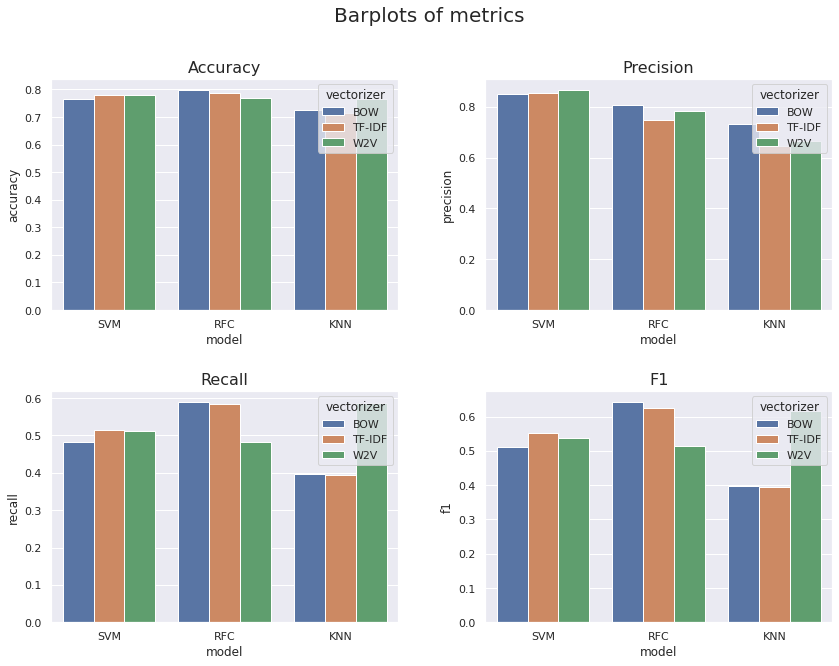

In [ ]:
#GRAPHS FOR METRICS

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(14, 10)})
fig, axis = plt.subplots(2, 2)

fig.subplots_adjust(hspace=0.35, wspace=0.25)

df_acc = pd.DataFrame(data=list(zip(accuracy, model, vector)), columns=['accuracy', 'model', 'vectorizer'])

df_prec = pd.DataFrame(data=list(zip(precision, model, vector)), columns=['precision', 'model', 'vectorizer'])

df_rec = pd.DataFrame(data=list(zip(recall, model, vector)), columns=['recall', 'model', 'vectorizer'])

df_f1 = pd.DataFrame(data=list(zip(f1, model, vector)), columns=['f1', 'model', 'vectorizer'])


# plot 1
p1 = sns.barplot(x='model', y='accuracy', data=df_acc, ci=None, hue='vectorizer', ax=axis[0,0])

p1.set_title('Accuracy', fontsize=16)
# plot 2
p2 = sns.barplot(x='model', y='precision', data=df_prec, ci=None, hue='vectorizer', ax=axis[0,1])

p2.set_title('Precision', fontsize=16)

# plot 3
p3 = sns.barplot(x='model', y='recall', data=df_rec, ci=None, hue='vectorizer', ax=axis[1,0])

p3.set_title('Recall', fontsize=16)

# plot 4
p4 = sns.barplot(x='model', y='f1', data=df_f1, ci=None, hue='vectorizer', ax=axis[1,1])

p4.set_title('F1', fontsize=16)

fig.suptitle('Barplots of metrics', fontsize=20)

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5cea983fb32d691cad489c121854a5e45d844a7b74b2c5729cc445dd52acadc2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.206690 -0.048558       1        1  23.441899
2      0.213865  0.109908       2        1  18.477206
6     -0.024103 -0.148936       3        1  13.574120
1     -0.023250  0.002344       4        1  11.912034
0     -0.136768 -0.124299       5        1  11.371670
4     -0.079905 -0.015731       6        1  10.875206
5     -0.156528  0.225273       7        1  10.347866, topic_info=          Term        Freq       Total Category  logprob  loglift
138     pfizer  209.000000  209.000000  Default  30.0000  30.0000
224       dose  238.000000  238.000000  Default  29.0000  29.0000
132   biontech  141.000000  141.000000  Default  28.0000  28.0000
57         get  193.000000  193.000000  Default  27.0000  27.0000
63       first  204.000000  204.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
213          w   11.877034   16.023945   Topic7  -4.9846   1.9689
693         dr   13.885418   23.275975   Topic7  -4.8284   1.7518
1373  year_old   13.479773   26.577565   Topic7  -4.8581   1.5895
21     vaccine   34.818882  738.204296   Topic7  -3.9091  -0.7857
17        year   10.980028   41.325140   Topic7  -5.0632   0.9430

[326 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
536       1  0.964051        able
1655      7  0.889763         add
207       1  0.926645  administer
207       3  0.063907  administer
577       2  0.962188         age
...     ...       ...         ...
17        7  0.266182        year
1373      2  0.489134    year_old
1373      7  0.489134    year_old
678       2  0.975408         yes
442       7  0.986233         yet

[352 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 2, 1, 5, 6])

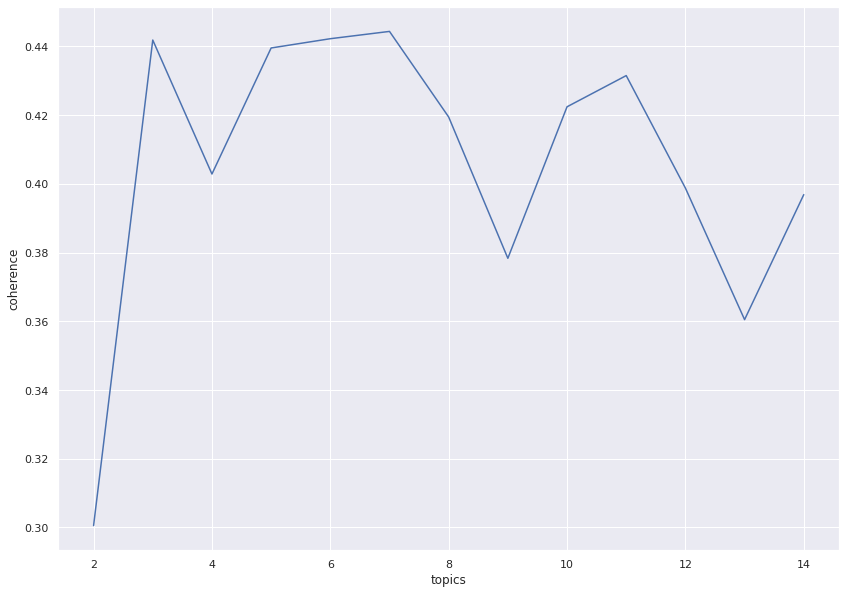

In [ ]:
# LDA
import gensim
import gensim.corpora as corpora
import numpy as np
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import warnings

warnings.filterwarnings("ignore")

def make_list(df_clean):
  strtweet = []

  for tweet in df_clean['text']:

    if type(tweet) == str:
      tweet = tweet.split()

    strtweet.append(tweet)

  return strtweet  

def make_bigrams(texts):
  return [bigram_mod[doc] for doc in texts]

data_words = make_list(df_lda)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 

# Faster way to get a sentence clubbed as a trigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# Topics range
min_topics = 2
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# LIST THAT HOLDS COHERENCE METRIC FOR EVERY DIFFERENT NUMBER OF TOPICS
coher_list = []

# LIST THAT HOLDS THE NUMBER OF TOPICS
topics = []

# Build LDA model
for i in topics_range:
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=i, random_state=100, chunksize=100, passes=10, alpha=0.01, eta=0.9)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()

  coher_list.append(coherence_lda)
  topics.append(i)


df_lda = pd.DataFrame(list(zip(topics, coher_list)), columns=['topics', 'coherence'])

p = sns.lineplot(x = 'topics', y = 'coherence', data = df_lda, ci=False, markers=True)

max_coh = 0.0
max_topic = 0
j = 0
for i,j in zip(coher_list, range(len(topics))):
  if i > max_coh:
    max_coh = i
    max_topic = topics[j]

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=max_topic, random_state=100, chunksize=100, passes=10, per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

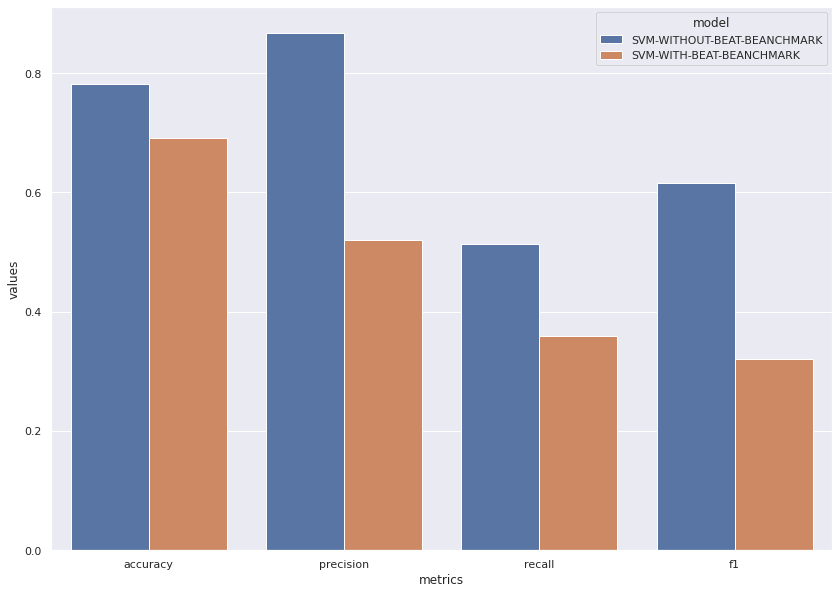

In [ ]:
# BEAT THE BENCHMARK


import warnings
import itertools 


X_tr, X_te, Y_tr, Y_te = train_test_split(df[['text', 'emark', 'qmark', 'atmark', 'hyplinks', 'retweets']], df['sentiment'], test_size = 0.2)

embeddings_index = {}
f = open('./glove/glove.twitter.27B.100d.txt')

numWeights = 100

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    
    if coefs.size == numWeights:
      coefs = coefs.reshape([1,numWeights])

    embeddings_index[word] = coefs

f.close()

X_tr_w2v = []

for tweet, emark, qmark, atmark, hlink, retweet in itertools.zip_longest(X_tr['text'], X_tr['emark'], X_tr['qmark'], X_tr['atmark'], X_tr['hyplinks'], X_tr['retweets']):
  lwords = list(tweet.split())
  size = len(lwords)
  sumWeights = np.zeros((1,numWeights))

  for word in lwords:
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
      sumWeights = np.add(sumWeights, embedding_vector) 

  avgWeights = sumWeights / size
  avgWeights = np.append(avgWeights, emark)
  avgWeights = np.append(avgWeights, qmark)
  avgWeights = np.append(avgWeights, atmark)
  avgWeights = np.append(avgWeights, hlink)
  avgWeights = np.append(avgWeights, retweet)

  X_tr_w2v.append(avgWeights)

X_tr_w2v = np.array(X_tr_w2v).reshape((X_tr['text'].size, numWeights+5))

X_te_w2v = []

for tweet, emark, qmark, atmark, hlink, retweet in itertools.zip_longest(X_te['text'], X_te['emark'], X_te['qmark'], X_te['atmark'], X_te['hyplinks'], X_te['retweets']):
  lwords = list(tweet.split())
  size = len(lwords)
  sumWeights = np.zeros((1, numWeights))

  for word in lwords:
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
      sumWeights = np.add(sumWeights, embedding_vector) 

  avgWeights = sumWeights / size

  avgWeights = sumWeights / size

  # ADD THE NEW Characteristics IN THE VECTORIZER
  avgWeights = np.append(avgWeights, emark)         # HOLDS THE NUMBER OF '!' IN A TWEET
  avgWeights = np.append(avgWeights, qmark)         # HOLDS THE NUMBER OF '?' IN A TWEET
  avgWeights = np.append(avgWeights, atmark)        # HOLDS THE NUMBER OF '@' IN A TWEET
  avgWeights = np.append(avgWeights, hlink)         # HOLDS THE NUMBER OF HYPERLINKS IN A TWEET
  avgWeights = np.append(avgWeights, retweet)       # HOLDS THE NUMBER OF RETWEETS OF A TWEET

  X_te_w2v.append(avgWeights)

X_te_w2v = np.array(X_te_w2v).reshape((X_te['text'].size, numWeights+5))

svm = SVC()

# USING W2V
svm.fit(X_tr_w2v, Y_tr)
y_pred = svm.predict(X_te_w2v)

metrics = []
model = []

values = []
values.append(accuracy[2])
values.append(accuracy_score(Y_te, y_pred))
metrics = 2*['accuracy']
model.append('SVM-WITHOUT-BEAT-BEANCHMARK')
model.append('SVM-WITH-BEAT-BEANCHMARK')

values.append(precision[2])
values.append(precision_score(Y_te, y_pred, average='macro'))
metrics += 2*['precision']
model.append('SVM-WITHOUT-BEAT-BEANCHMARK')
model.append('SVM-WITH-BEAT-BEANCHMARK')

values.append(recall[2])
values.append(recall_score(Y_te, y_pred, average='macro'))
metrics += 2*['recall']
model.append('SVM-WITHOUT-BEAT-BEANCHMARK')
model.append('SVM-WITH-BEAT-BEANCHMARK')

values.append(f1[-1])
values.append(f1_score(Y_te, y_pred, average='macro'))
metrics += 2*['f1']
model.append('SVM-WITHOUT-BEAT-BEANCHMARK')
model.append('SVM-WITH-BEAT-BEANCHMARK')

df_bench = pd.DataFrame(data=list(zip(values, model, metrics)), columns=['values', 'model', 'metrics'])

df_bench.head(10)
sns.barplot(x='metrics', y='values', data=df_bench, ci=None, hue='model')


##Συμπέρασμα

Με την προσθήκη καινούργιων χαρακτηριστικών στον vectorizer (word-embeddings), ο svm δεν καλυτερεύει.

## NOTES

1) Το lemmatization το υλοποιήσαμε στην άσκηση 1 και όχι στο μπόνους, ούτως ώστε να τρέχουν πιο γρήγορα τα μοντέλα μας. Γι'αυτό και στο beat the benchmark δεν παρατηρήσαμε κάποια βελτίωση.

2) Για τις ασκήσεις 1 και 2 χρησιμοποιήσαμε το 50% του dataset.

3) Για τις υπόλοιπες ασκήσεις χρησιμοποιήσαμε το 1% του dataset (2000 data) λόγω χρόνου, αφού ο GridSearchCV χρειάζοταν υπερβολικά πάρα πολύ χρόνο για να τρέξει και για τα τρία μοντέλα με vectorizer το BOW.